# RECESSION PREDICTION

## Kalinga Institute of Industrial Technology

### Project Dataset Formation

Pull FRED Data from Quandl and Load S&P 500 Data from CSV (Downloaded from Yahoo! Finance)

In [1]:
%pip install quandl -q
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import quandl as qnd

tbond_10yr = qnd.get('FRED/GS10')
tbond_10yr_pchange = qnd.get('FRED/GS10', transformation = "rdiff") #Percent change transformation
spread_2yr = qnd.get('FRED/T10Y2YM')
fedrate = qnd.get('FRED/FEDFUNDS')
fedrate_pchange = qnd.get('FRED/FEDFUNDS', transformation = "rdiff") #Percent change transformation
nonfarm_payrolls = qnd.get('FRED/PAYEMS')
nonfarm_payrolls_pchange = qnd.get('FRED/PAYEMS', transformation = "rdiff") #Percent change transformation
cpi = qnd.get('FRED/CPIAUCSL')
cpi_pchange = qnd.get('FRED/CPIAUCSL', transformation = "rdiff") #Percent change transformation
recessions = qnd.get('FRED/USREC')
snp_500 = pd.read_csv('S&P 500 Index.csv', sep = ',', parse_dates = ['Date'], index_col = 'Date') #Four columns of percent change transformations

Note: you may need to restart the kernel to use updated packages.


Join Data into a Single DataFrame

In [2]:
df = pd.concat([tbond_10yr, tbond_10yr_pchange, spread_2yr, fedrate, fedrate_pchange, nonfarm_payrolls, nonfarm_payrolls_pchange, cpi, cpi_pchange], axis = 1, join = 'inner')
df.columns = ['10yr Tbond', '% Change Tbond', '2yr Spread', 'Fedrate', '% Change Fedrate', 'Nonfarm Payrolls', '% Change Payrolls', 'CPI', '% Change CPI']
df.head()

,10yr Tbond,% Change Tbond,2yr Spread,Fedrate,% Change Fedrate,Nonfarm Payrolls,% Change Payrolls,CPI,% Change CPI
Date,,,,,,,,,
1976-06-01,7.86,-0.005063,0.80,5.48,0.035917,79376.0,0.000807,56.7,0.005319
1976-07-01,7.83,-0.003817,0.98,5.31,-0.031022,79547.0,0.002154,57.0,0.005291
1976-08-01,7.77,-0.007663,1.14,5.29,-0.003766,79704.0,0.001974,57.3,0.005263
1976-09-01,7.59,-0.023166,1.17,5.25,-0.007561,79892.0,0.002359,57.6,0.005236
1976-10-01,7.41,-0.023715,1.43,5.02,-0.043810,79911.0,0.000238,57.9,0.005208


In [3]:
df = df.join(snp_500, how = 'inner')
df = df.join(recessions, how = 'inner')
df.columns = ['10yr Tbond', '% Change Tbond', '2yr Spread', 'Fedrate', '% Change Fedrate', 'Nonfarm Payrolls', '% Change Payrolls', 'CPI', '% Change CPI', 'S&P 500', '% Change 1M', '% Change 3M', '% Change 6M', '% Change 12M', 'Recession']
df.tail()

,10yr Tbond,% Change Tbond,2yr Spread,Fedrate,% Change Fedrate,Nonfarm Payrolls,% Change Payrolls,CPI,% Change CPI,S&P 500,% Change 1M,% Change 3M,% Change 6M,% Change 12M,Recession
Date,,,,,,,,,,,,,,,
2020-11-01,0.87,0.101266,0.70,0.09,0.000000,142612.0,0.002340,260.721,0.001417,3621.63,0.107546,0.034660,0.189639,0.153025,0.0
2020-12-01,0.93,0.068966,0.79,0.09,0.000000,142497.0,-0.000806,261.564,0.003233,3756.07,0.037121,0.116881,0.211522,0.162589,0.0
2021-01-01,1.08,0.161290,0.95,0.09,0.000000,143017.0,0.003649,262.200,0.002432,3714.24,-0.011137,0.135867,0.135464,0.151517,0.0
2021-02-01,1.26,0.166667,1.14,0.08,-0.111111,143727.0,0.004964,263.346,0.004371,3811.15,0.026091,0.052330,0.088804,0.290070,0.0
2021-03-01,1.61,0.277778,1.46,0.07,-0.125000,144431.0,0.004898,265.028,0.006387,3972.89,0.042439,0.057725,0.181353,0.555014,0.0


Create Correlation Heat map for Feature Selection

<AxesSubplot:>

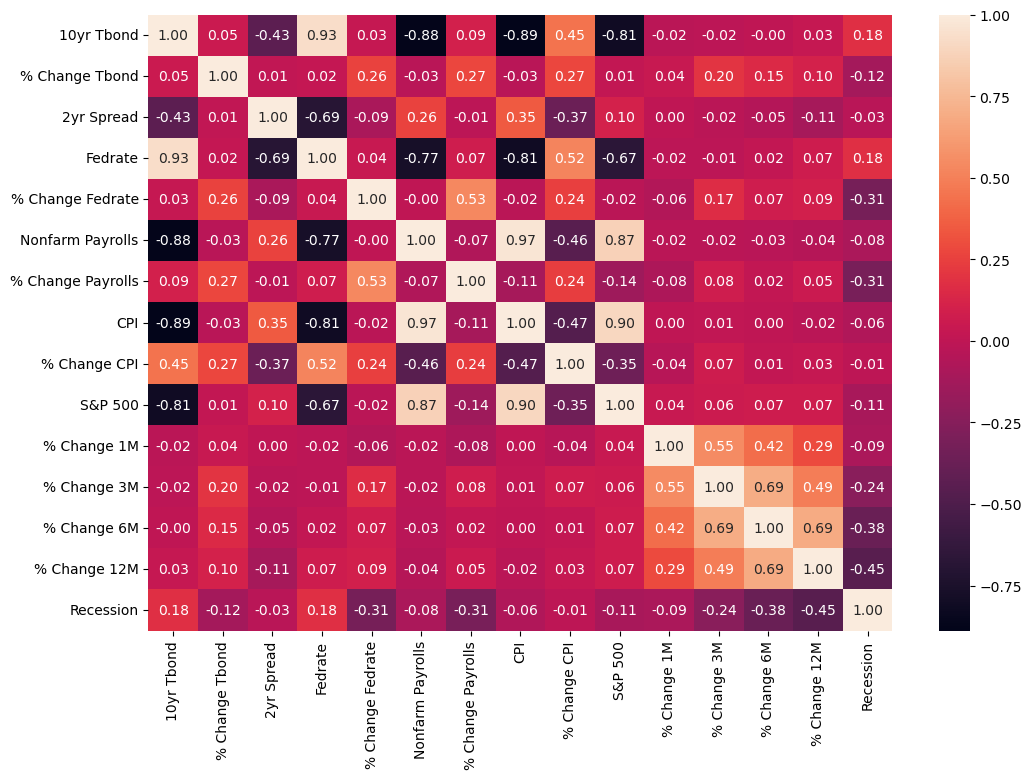

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

Create Final Dataset from Selected Features

In [5]:
data = df.drop(['% Change Tbond', 'Fedrate', 'Nonfarm Payrolls', '% Change CPI', 'S&P 500', '% Change 1M', '% Change 3M', '% Change 6M'], axis = 1)
data.to_csv('Project Dataset.csv')
data.head()

,10yr Tbond,2yr Spread,% Change Fedrate,% Change Payrolls,CPI,% Change 12M,Recession
Date,,,,,,,
1976-06-01,7.86,0.80,0.035917,0.000807,56.7,0.095493,0.0
1976-07-01,7.83,0.98,-0.031022,0.002154,57.0,0.165521,0.0
1976-08-01,7.77,1.14,-0.003766,0.001974,57.3,0.184507,0.0
1976-09-01,7.59,1.17,-0.007561,0.002359,57.6,0.254799,0.0
1976-10-01,7.41,1.43,-0.043810,0.000238,57.9,0.155660,0.0


### About the Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 539 entries, 1976-06-01 to 2021-03-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   10yr Tbond         539 non-null    float64
 1   2yr Spread         539 non-null    float64
 2   % Change Fedrate   539 non-null    float64
 3   % Change Payrolls  539 non-null    float64
 4   CPI                539 non-null    float64
 5   % Change 12M       539 non-null    float64
 6   Recession          539 non-null    float64
dtypes: float64(7)
memory usage: 33.7 KB


In [7]:
data.Recession.value_counts(normalize = True) #Percentage of each label

0.0    0.890538
1.0    0.109462
Name: Recession, dtype: float64

In [8]:
data.describe()

,10yr Tbond,2yr Spread,% Change Fedrate,% Change Payrolls,CPI,% Change 12M,Recession
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,6.059332,0.926772,-0.000327,0.000883,165.437275,0.096023,0.109462
std,3.316229,0.904378,0.123733,0.008742,58.449571,0.155999,0.312508
min,0.620000,-2.130000,-0.923077,-0.135710,56.700000,-0.447562,0.000000
25%,3.390000,0.250000,-0.026546,0.000449,114.500000,0.014011,0.000000
50%,5.740000,0.850000,0.000000,0.001408,164.100000,0.109103,0.000000
75%,8.130000,1.560000,0.029518,0.002342,217.433000,0.189224,0.000000
max,15.320000,2.830000,1.000000,0.033833,265.028000,0.555014,1.000000


### Training Data, Testing Data, and Cross Validation Data Splits

In [9]:
#70/30 sequential train-test split
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:-1]
y = data.loc[:, 'Recession']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=False, random_state=1)

In [10]:
#For cross validation
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

index = 1
for train_index, test_index in tscv.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    print('Split %d.' % index, 'Training set observations: %d,' % len(train_index), 'Testing set observations: %d' % len(test_index))
    index += 1

Split 1. Training set observations: 94, Testing set observations: 89
Split 2. Training set observations: 183, Testing set observations: 89
Split 3. Training set observations: 272, Testing set observations: 89
Split 4. Training set observations: 361, Testing set observations: 89
Split 5. Training set observations: 450, Testing set observations: 89


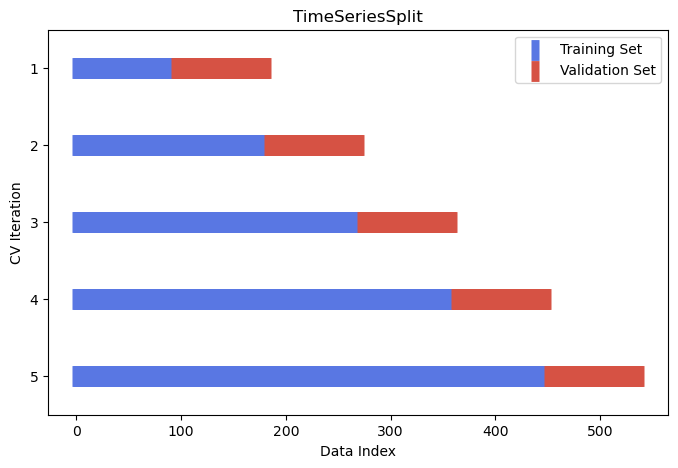

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))

for ii, (tr, tt) in enumerate(tscv.split(X, y)):
    l1 = ax.scatter(tr, [ii+1] * len(tr), c=[plt.cm.coolwarm(.1)], marker='_', lw=15)
    l2 = ax.scatter(tt, [ii+1] * len(tt), c=[plt.cm.coolwarm(.9)], marker='_', lw=15)
    ax.set(ylim=[5.5, 0.5], title='TimeSeriesSplit', xlabel='Data Index', ylabel='CV Iteration')
    ax.legend([l1, l2], ['Training Set', 'Validation Set'])

### Logistic Regression Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logpredict = logreg.predict(X_test)

print("Unscaled Logistic Regression Accuracy: {:.2f}%".format(logreg.score(X_test, y_test)*100))
print(classification_report(y_test, logpredict))

Unscaled Logistic Regression Accuracy: 87.04%
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       141
         1.0       0.00      0.00      0.00        21

    accuracy                           0.87       162
   macro avg       0.44      0.50      0.47       162
weighted avg       0.76      0.87      0.81       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

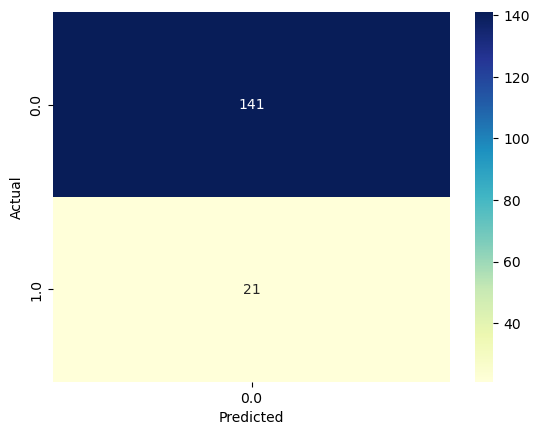

In [24]:

confusion_matrix = pd.crosstab(y_test, logpredict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

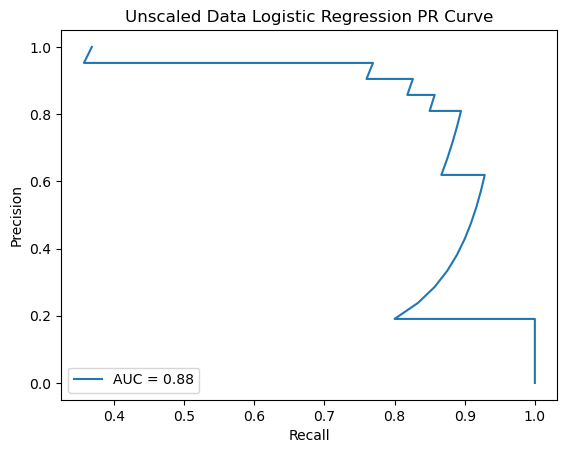

In [25]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

logreg_pr_auc = average_precision_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Logistic Regression PR Curve')
plt.legend(loc="lower left")
plt.show()

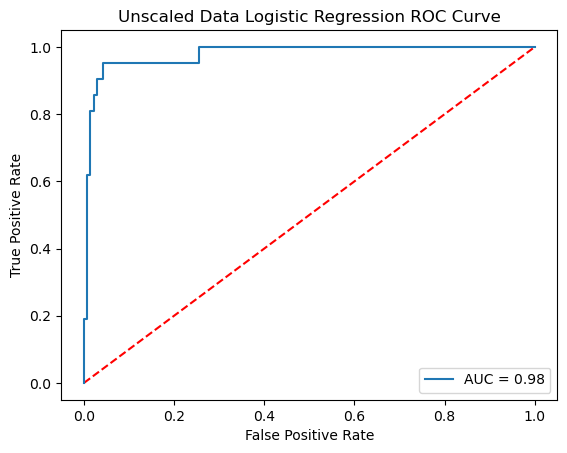

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),
        ('LogReg', LogisticRegression())]
c_space = np.logspace(-5, 2, 50)

parameters = {'LogReg__C': c_space, 'LogReg__penalty': ['l1', 'l2']}

pipeline = Pipeline(steps)

logreg_scaled_cv = GridSearchCV(pipeline, parameters, cv=tscv, n_jobs=-1)

logreg_scaled_cv.fit(X_train, y_train)

print("Tuned Logistic Regression with Scaled Parameters: {}".format(logreg_scaled_cv.best_params_)) 
print('Tuned Logistic Regression with Scaled Accuracy: {:.2f}%'.format(logreg_scaled_cv.score(X_test, y_test)*100))
print(classification_report(y_test, logreg_scaled_cv.predict(X_test)))

Tuned Logistic Regression with Scaled Parameters: {'LogReg__C': 1.0, 'LogReg__penalty': 'l2'}
Tuned Logistic Regression with Scaled Accuracy: 94.44%
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       141
         1.0       0.93      0.62      0.74        21

    accuracy                           0.94       162
   macro avg       0.94      0.81      0.86       162
weighted avg       0.94      0.94      0.94       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

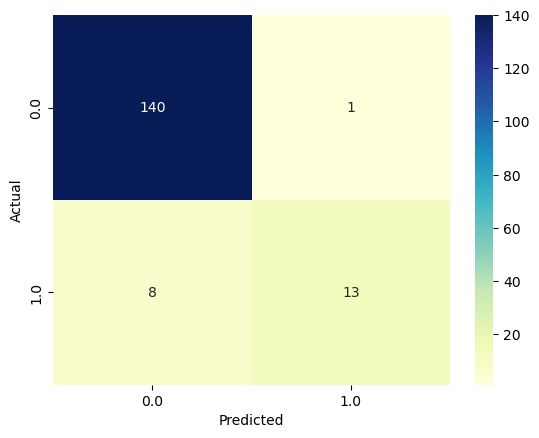

In [19]:
confusion_matrix = pd.crosstab(y_test, logreg_scaled_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

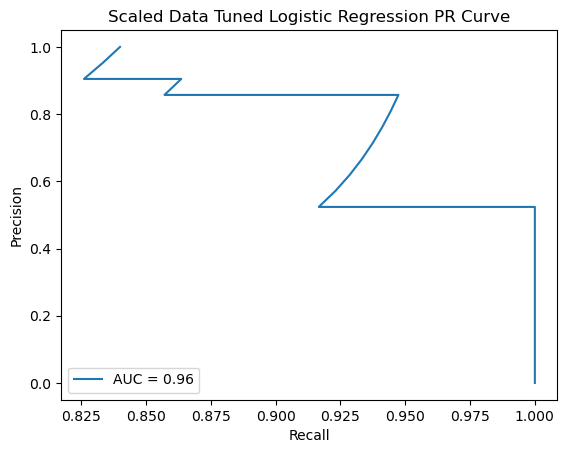

In [20]:
logreg_scaled_pr_auc = average_precision_score(y_test, logreg_scaled_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, logreg_scaled_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Tuned Logistic Regression PR Curve')
plt.legend(loc="lower left")
plt.show()

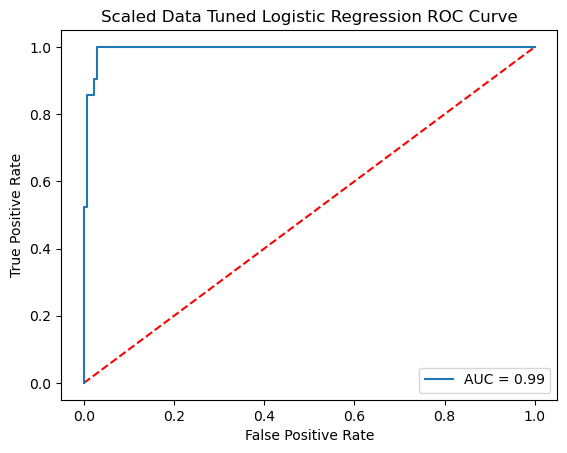

In [21]:
y_pred_prob_scaled = logreg_scaled_cv.predict_proba(X_test)[:,1]

logreg_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Tuned Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Support Vector Classifier

In [27]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=1)

svc.fit(X_train, y_train)

svcpredict = svc.predict(X_test)

print("Unscaled Support Vector Classifier Accuracy: {:.2f}%".format(svc.score(X_test, y_test)*100))
print(classification_report(y_test, svcpredict))

Unscaled Support Vector Classifier Accuracy: 87.04%
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       141
         1.0       0.00      0.00      0.00        21

    accuracy                           0.87       162
   macro avg       0.44      0.50      0.47       162
weighted avg       0.76      0.87      0.81       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

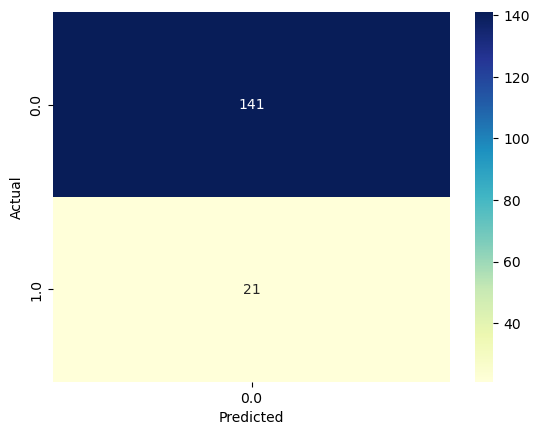

In [28]:
confusion_matrix = pd.crosstab(y_test, svcpredict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

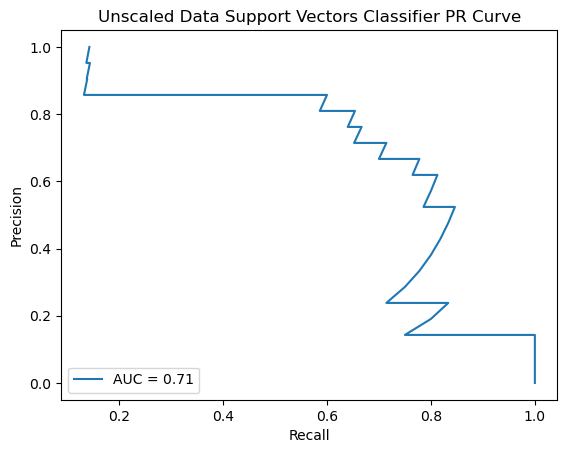

In [29]:
svc_pr_auc = average_precision_score(y_test, svc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Support Vectors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

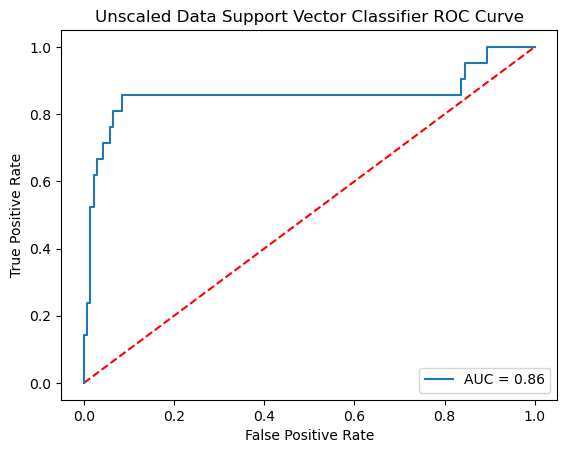

In [30]:
svc_roc_auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Support Vector Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
steps = [('scaler', StandardScaler()),
        ('SVC', SVC(probability=True, random_state=1))]

c_space = np.logspace(-5, 2, 50)
param_grid = {'SVC__C': c_space, 'SVC__kernel': ['linear', 'rbf', 'sigmoid'], 'SVC__gamma': ['scale', 'auto']}

pipeline = Pipeline(steps)

svc_scaled_cv = GridSearchCV(pipeline, param_grid, cv=tscv, n_jobs=-1)

svc_scaled_cv.fit(X_train, y_train)

print("Support Vector Classifier with Scaled Parameters: {}".format(svc_scaled_cv.best_params_)) 
print('Support Vector Classifier with Scaled Accuracy: {:.2f}%'.format(svc_scaled_cv.score(X_test, y_test)*100))
print(classification_report(y_test, svc_scaled_cv.predict(X_test)))

Support Vector Classifier with Scaled Parameters: {'SVC__C': 10.0, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}
Support Vector Classifier with Scaled Accuracy: 90.74%
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       141
         1.0       1.00      0.29      0.44        21

    accuracy                           0.91       162
   macro avg       0.95      0.64      0.70       162
weighted avg       0.92      0.91      0.88       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

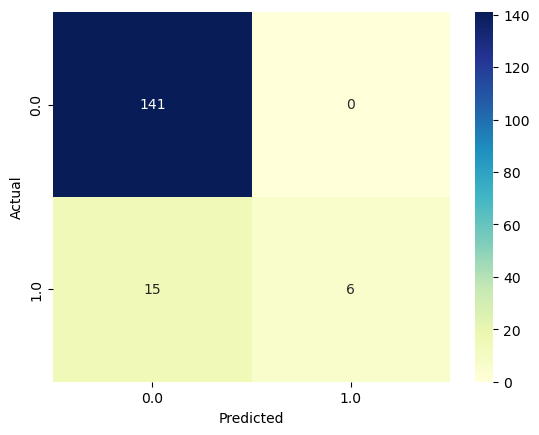

In [33]:
confusion_matrix = pd.crosstab(y_test, svc_scaled_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

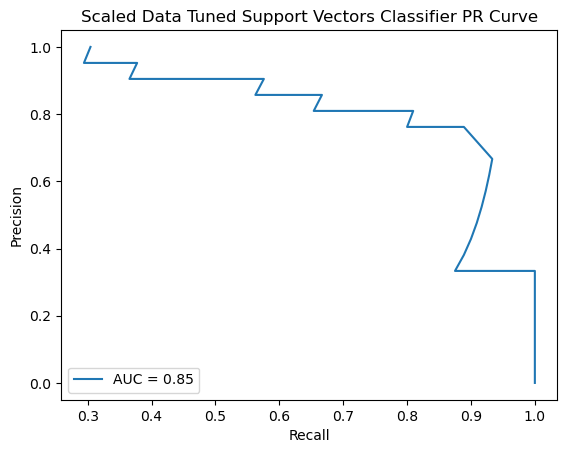

In [78]:
svc_scaled_pr_auc = average_precision_score(y_test, svc_scaled_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, svc_scaled_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Tuned Support Vectors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

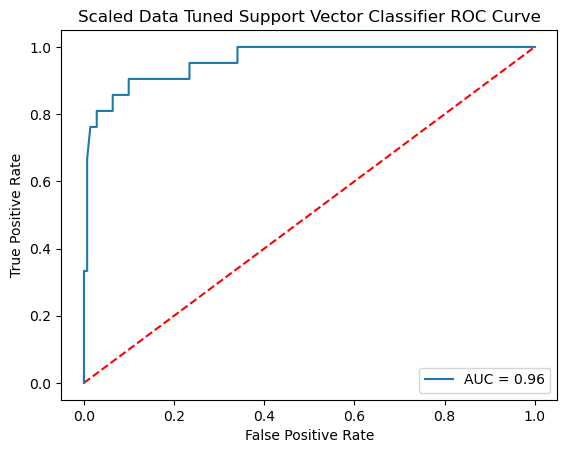

In [79]:
y_pred_prob_scaled = svc_scaled_cv.predict_proba(X_test)[:,1]

svc_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Tuned Support Vector Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()